In [2]:
#load analysis results and create vizs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import json

#import analysis funcs
import sys
sys.path.append('../src')
from statistical_analysis import load_cleaned_data

#load cleaned data
df = load_cleaned_data()

print('STATISTICAL ANALYSIS VISUALIZATION')
print('='*50)
print(f'Dataset: {len(df):,} tracks from {df["city"].nunique()} cities')

Loaded cleaned data: spotify_cleaned_20250707_184319.csv
Dataset: 1,562 tracks from 8 cities
STATISTICAL ANALYSIS VISUALIZATION
Dataset: 1,562 tracks from 8 cities


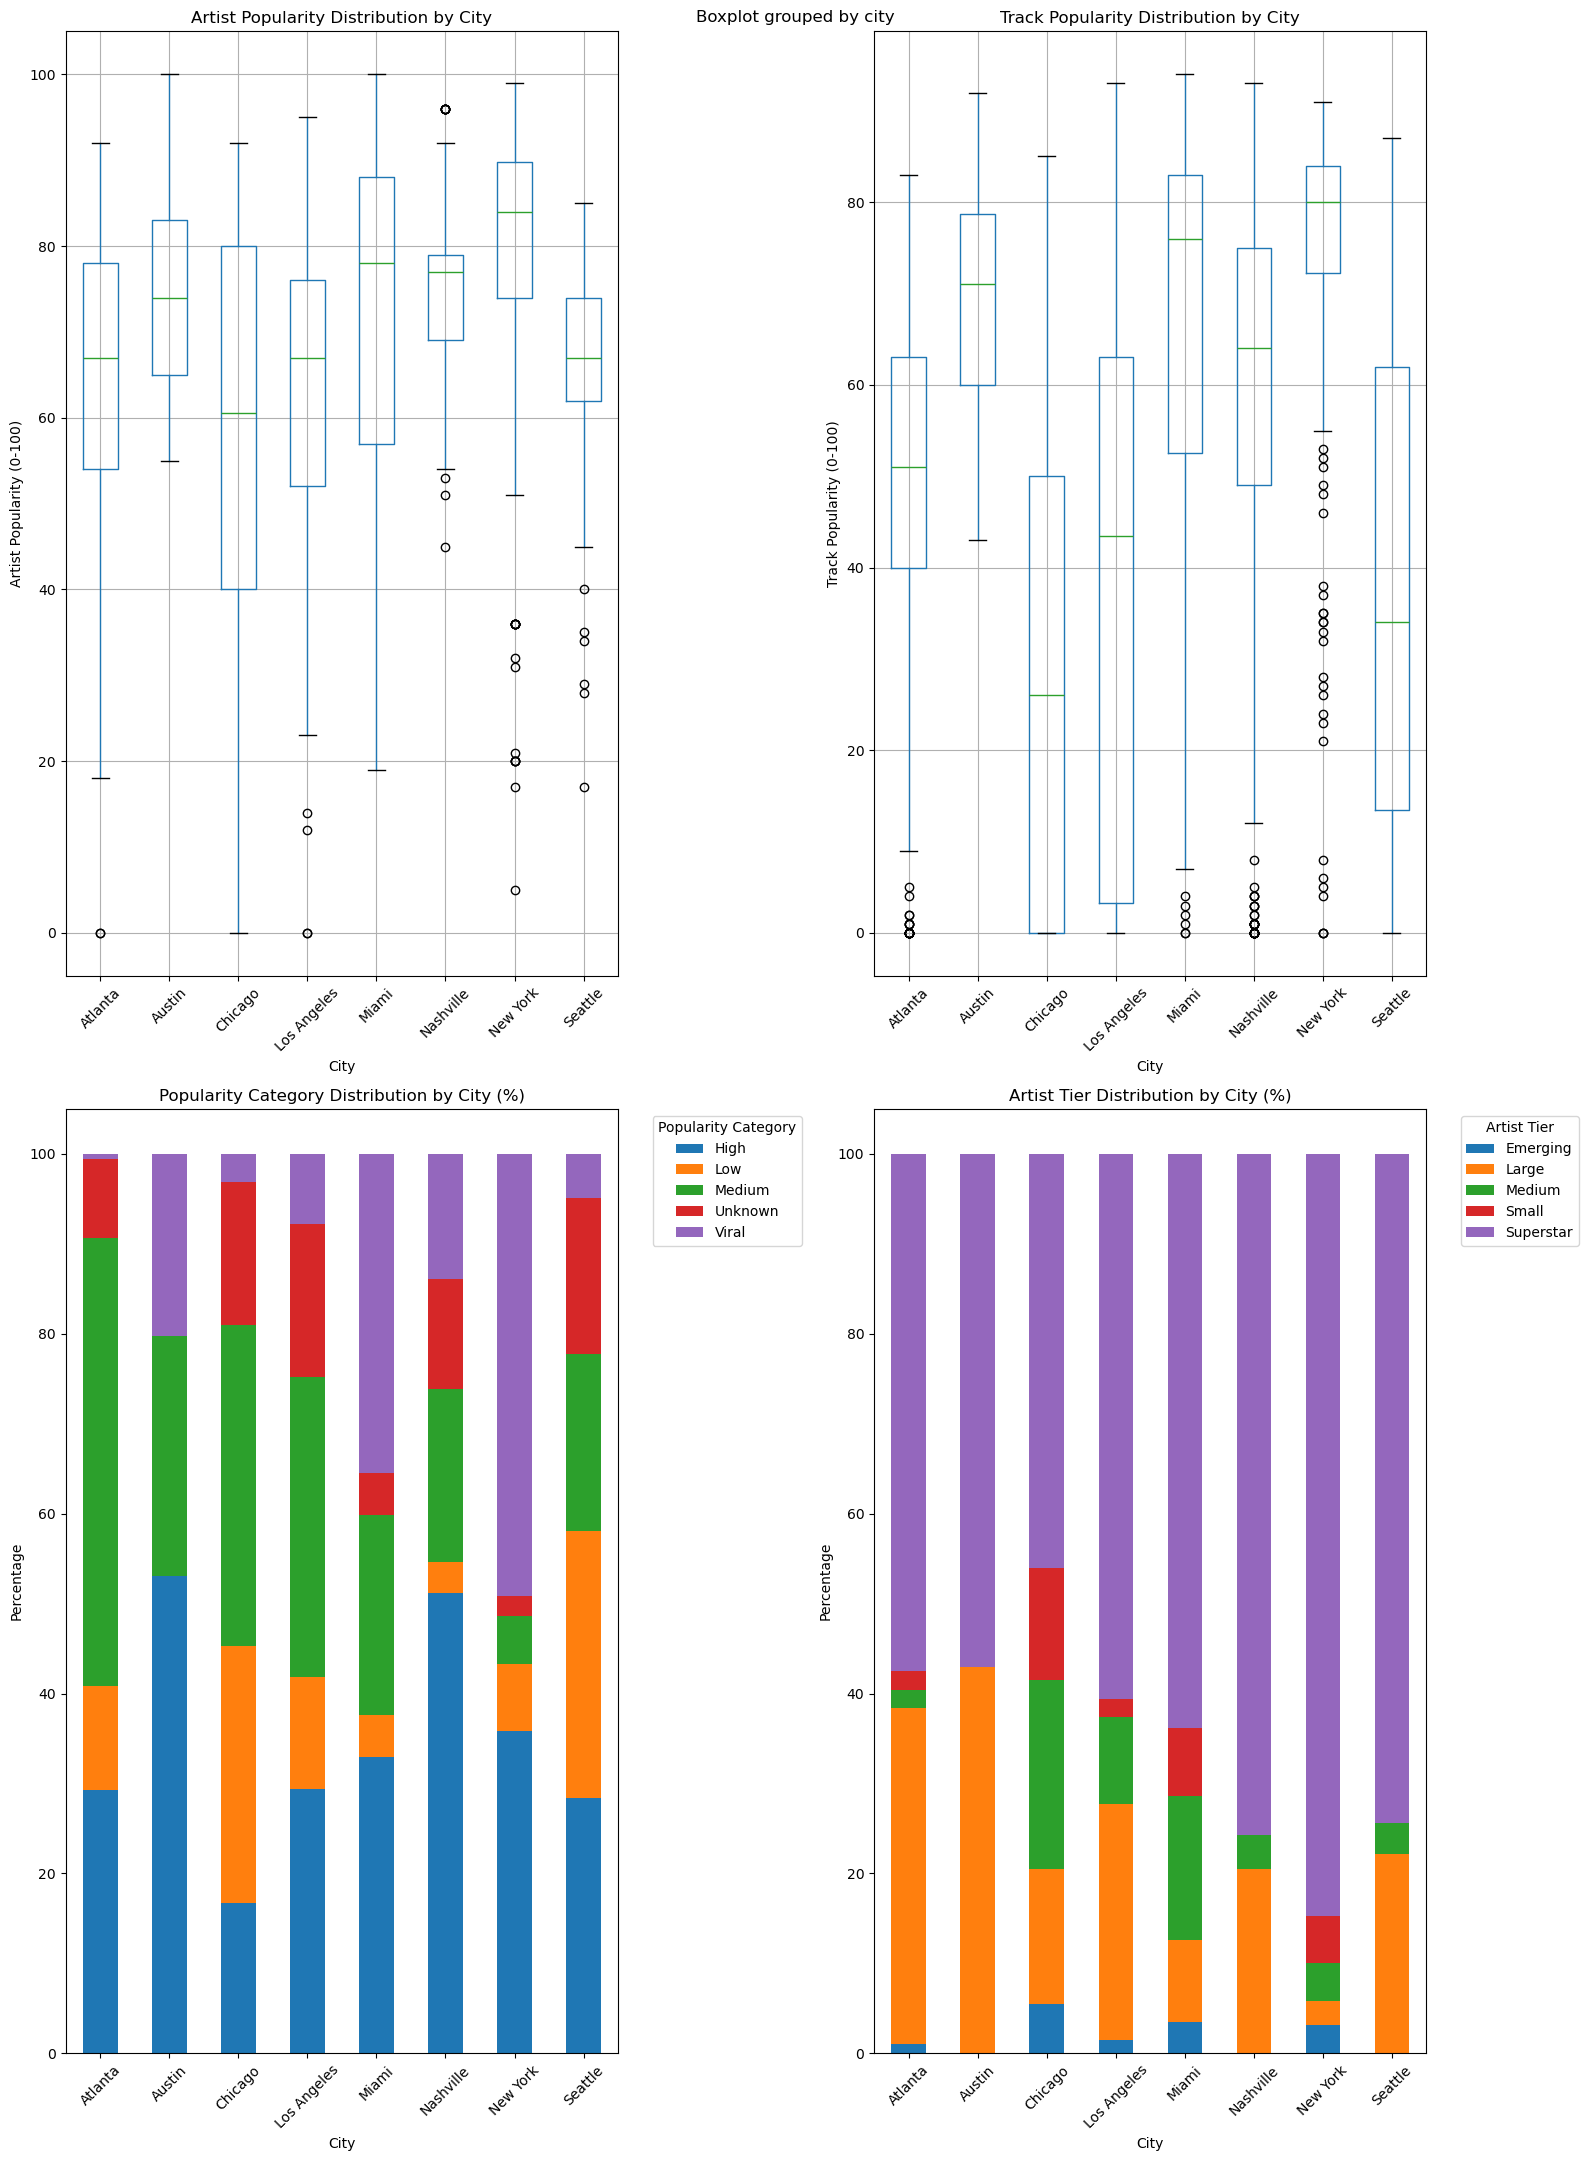

In [3]:
#pop analysis viz
fig, axes = plt.subplots(2,2, figsize=(16,22))
fig.suptitle('Regional Music DNA - Popularity Analysis', fontsize=16, fontweight='bold')

#artist pop by city
df.boxplot(column='artist_popularity', by='city', ax=axes[0,0])
axes[0,0].set_title('Artist Popularity Distribution by City')
axes[0,0].set_xlabel('City')
axes[0,0].set_ylabel('Artist Popularity (0-100)')
axes[0,0].tick_params(axis='x', rotation=45)

#track pop by city
df.boxplot(column='track_popularity', by='city', ax=axes[0,1])
axes[0,1].set_title('Track Popularity Distribution by City')
axes[0,1].set_xlabel('City')
axes[0,1].set_ylabel('Track Popularity (0-100)')
axes[0,1].tick_params(axis='x', rotation=45)

#pop category distribution
popularity_crosstab = pd.crosstab(df['city'], df['popularity_category'], normalize='index') * 100
popularity_crosstab.plot(kind='bar', stacked=True, ax=axes[1,0])
axes[1,0].set_title('Popularity Category Distribution by City (%)')
axes[1,0].set_xlabel('City')
axes[1,0].set_ylabel('Percentage')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(title='Popularity Category', bbox_to_anchor=(1.05, 1))

#artist tier distribution
tier_crosstab = pd.crosstab(df['city'], df['artist_tier'], normalize='index') * 100
tier_crosstab.plot(kind='bar', stacked=True, ax=axes[1,1])
axes[1,1].set_title('Artist Tier Distribution by City (%)')
axes[1,1].set_xlabel('City')
axes[1,1].set_ylabel('Percentage')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].legend(title='Artist Tier', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()


GENRE DIVERSITY ANALYSIS


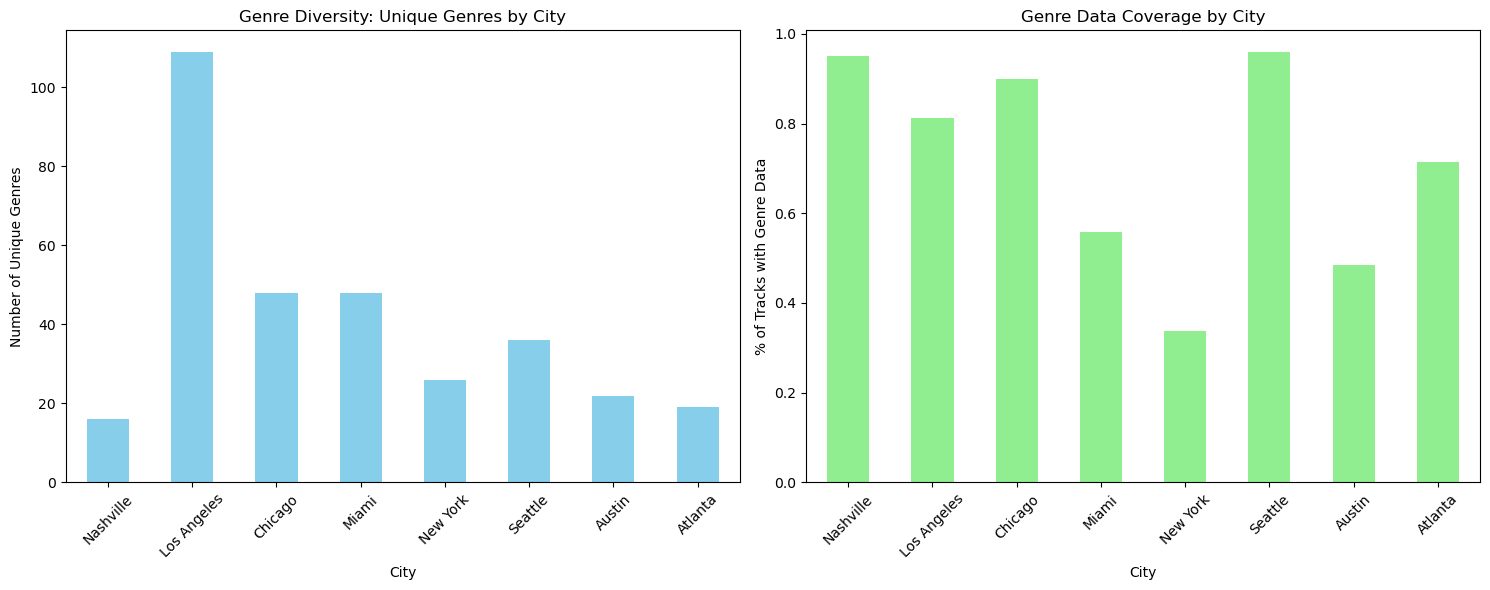

Genre Diversity Rankings:
  1. Los Angeles: 109.0 unique genres(0.551 ratio)
  2. Chicago: 48.0 unique genres(0.240 ratio)
  3. Miami: 48.0 unique genres(0.241 ratio)
  4. Seattle: 36.0 unique genres(0.181 ratio)
  5. New York: 26.0 unique genres(0.137 ratio)
  6. Austin: 22.0 unique genres(0.111 ratio)
  7. Atlanta: 19.0 unique genres(0.098 ratio)
  8. Nashville: 16.0 unique genres(0.086 ratio)


In [4]:
#genre diversity analysis
print('\nGENRE DIVERSITY ANALYSIS')
print('='*40)

#calc genre diversity metrics
genre_diversity = {}
for city in df['city'].unique():
    city_data = df[df['city'] == city]
    total_tracks = len(city_data)
    tracks_with_genres = city_data['artist_genres_clean'].notna().sum()
    
    #get all genres for this city
    all_genres = []
    for genres_str in city_data['artist_genres_clean'].dropna():
        if genres_str:
            all_genres.extend([g.strip() for g in genres_str.split(',')])
            
    unique_genres = len(set(all_genres))
    genre_diversity[city] = {
        'total_tracks': total_tracks,
        'unique_genres': unique_genres,
        'diversity_ratio': unique_genres/total_tracks if total_tracks > 0 else 0,
        'coverage_rate': tracks_with_genres/total_tracks if total_tracks > 0 else 0
    }
    
#create diversity viz
diversity_df = pd.DataFrame(genre_diversity).T

fig,axes = plt.subplots(1,2, figsize=(15,6))

#unique genres by city
diversity_df['unique_genres'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Genre Diversity: Unique Genres by City')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Number of Unique Genres')
axes[0].tick_params(axis='x', rotation=45)

#genre coverage rate
diversity_df['coverage_rate'].plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Genre Data Coverage by City')
axes[1].set_xlabel('City')
axes[1].set_ylabel('% of Tracks with Genre Data')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#print diversity insights
print('Genre Diversity Rankings:')
diversity_ranking = diversity_df.sort_values('unique_genres', ascending=False)
for i, (city, data) in enumerate(diversity_ranking.iterrows(), 1):
    print(f'  {i}. {city}: {data["unique_genres"]} unique genres({data["diversity_ratio"]:.3f} ratio)')

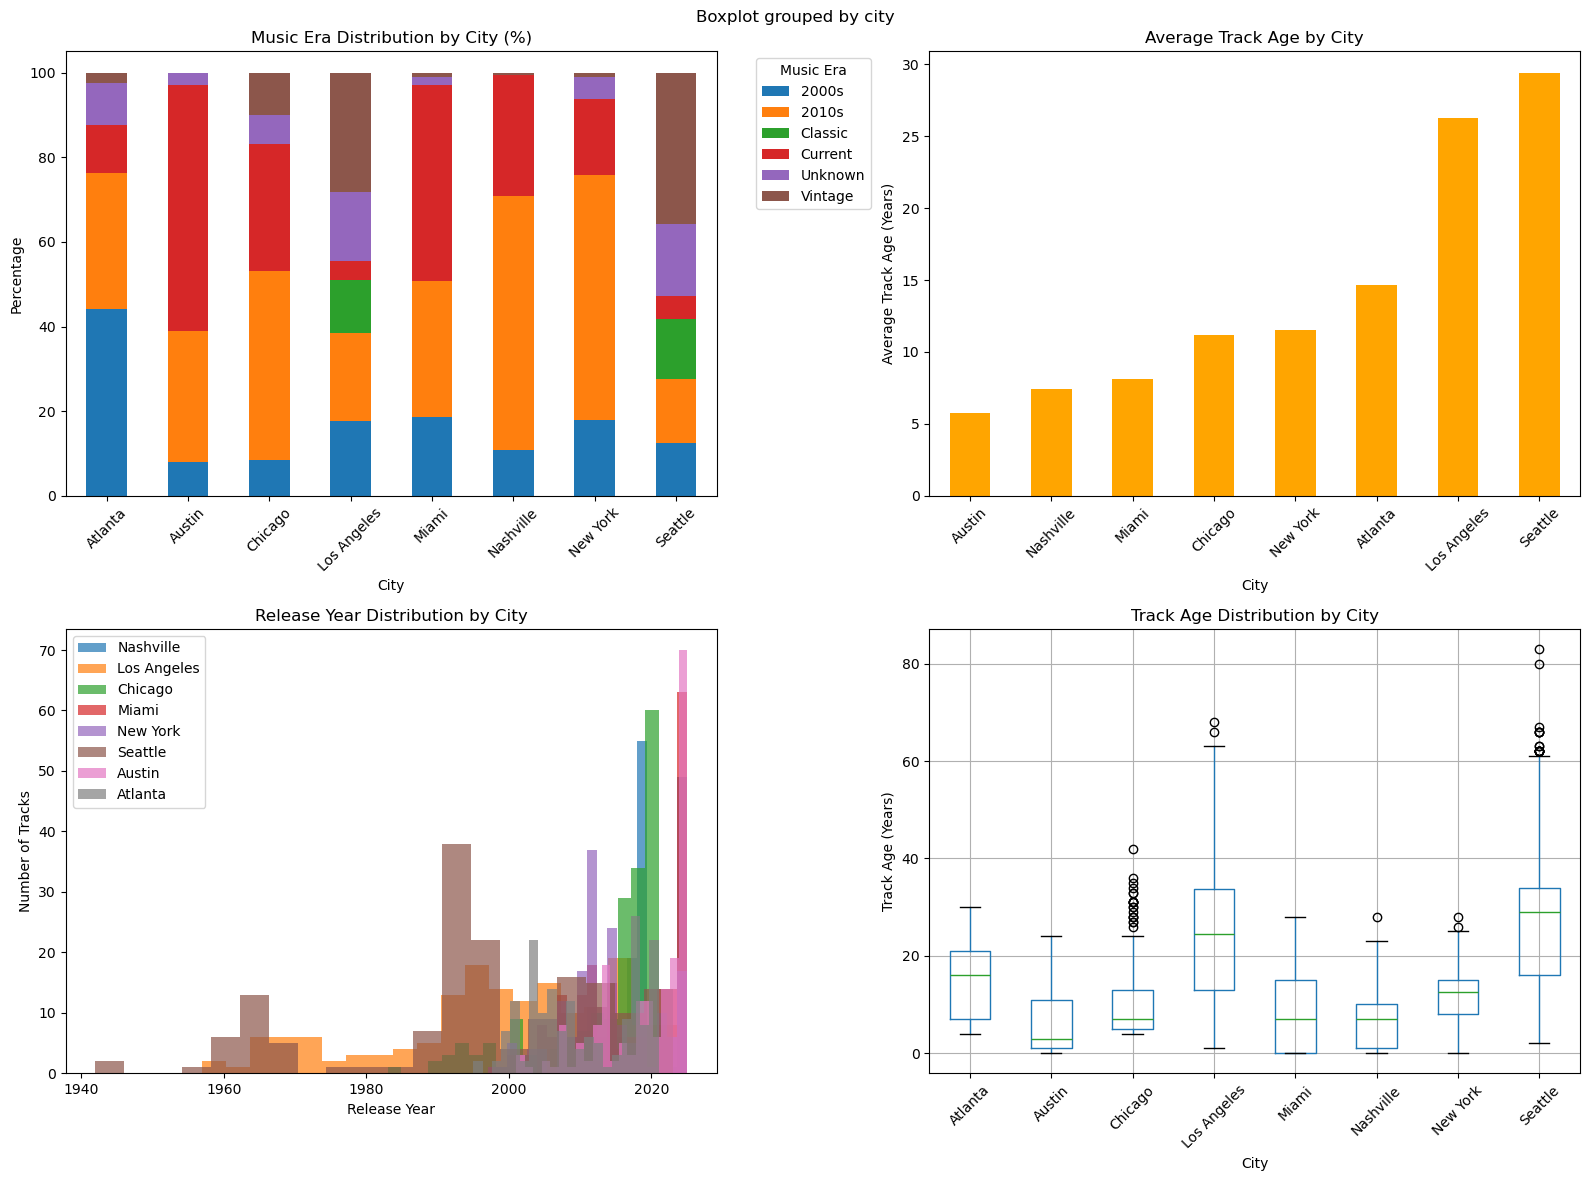

In [5]:
#temporal analysis viz
fig, axes = plt.subplots(2,2, figsize=(16,12))
fig.suptitle('Regional Music DNA - Temporal Analysis', fontsize=16, fontweight='bold')

#music era distribution
era_crosstab = pd.crosstab(df['city'], df['music_era'], normalize='index') * 100
era_crosstab.plot(kind='bar', stacked=True, ax=axes[0,0])
axes[0,0].set_title('Music Era Distribution by City (%)')
axes[0,0].set_xlabel('City')
axes[0,0].set_ylabel('Percentage')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].legend(title='Music Era', bbox_to_anchor=(1.05, 1))

#average track age by city
track_age_by_city = df.groupby('city')['track_age_years'].mean().sort_values()
track_age_by_city.plot(kind='bar', ax=axes[0,1], color='orange')
axes[0,1].set_title('Average Track Age by City')
axes[0,1].set_xlabel('City')
axes[0,1].set_ylabel('Average Track Age (Years)')
axes[0,1].tick_params(axis='x', rotation=45)

#release year distribution over time
for city in df['city'].unique():
   city_data = df[df['city'] == city]
   valid_years = city_data['release_year'].dropna()
   if len(valid_years) > 0:
       axes[1,0].hist(valid_years, alpha=0.7, label=city, bins=20)

axes[1,0].set_title('Release Year Distribution by City')
axes[1,0].set_xlabel('Release Year')
axes[1,0].set_ylabel('Number of Tracks')
axes[1,0].legend()

#track age distribution
df.boxplot(column='track_age_years', by='city', ax=axes[1,1])
axes[1,1].set_title('Track Age Distribution by City')
axes[1,1].set_xlabel('City')
axes[1,1].set_ylabel('Track Age (Years)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


CORRELATION ANALYSIS


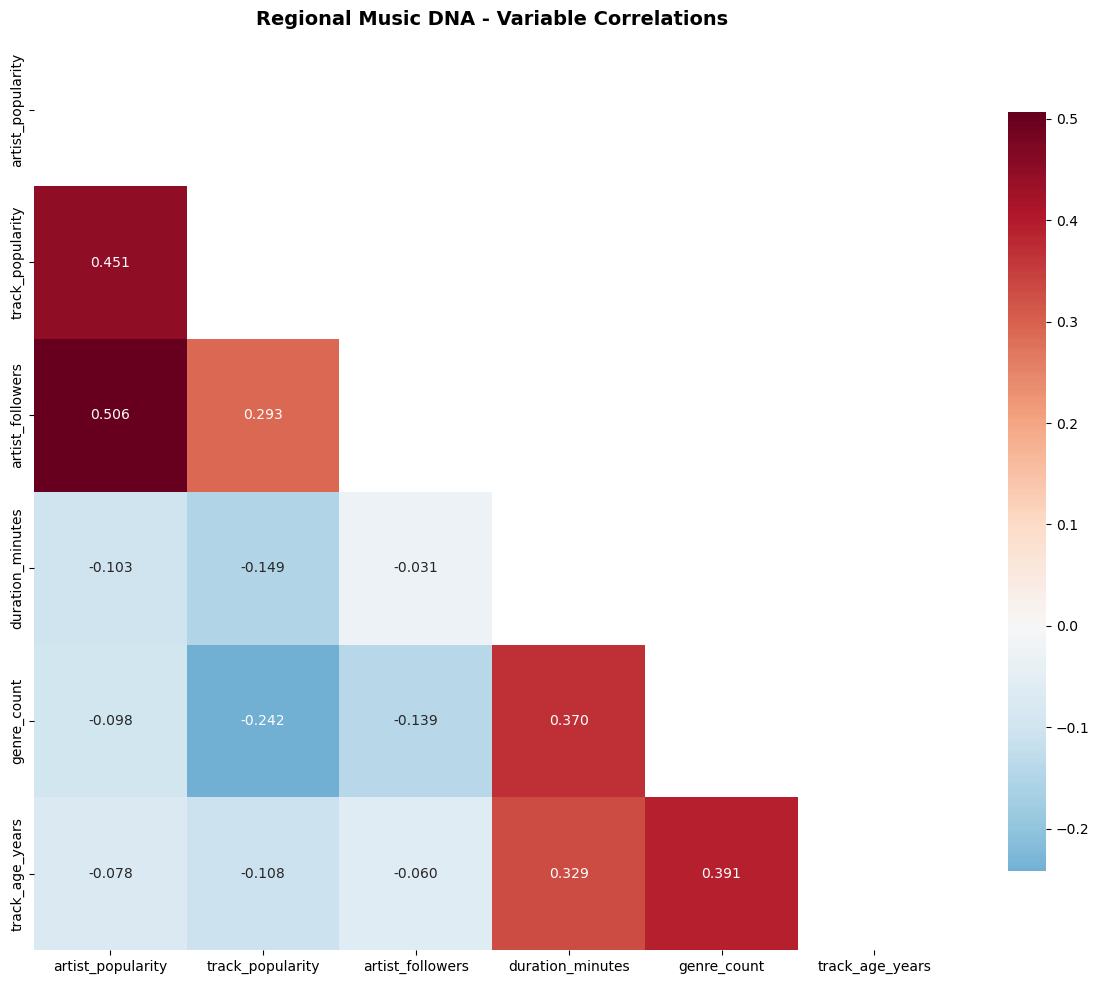

Strongest Correlations:
   1. artist_popularity ↔ artist_followers: 0.506 (Moderate positive)
   2. artist_popularity ↔ track_popularity: 0.451 (Moderate positive)
   3. genre_count ↔ track_age_years: 0.391 (Moderate positive)
   4. duration_minutes ↔ genre_count: 0.370 (Moderate positive)
   5. duration_minutes ↔ track_age_years: 0.329 (Moderate positive)


In [6]:
#corr analysis and heatmap
print('\nCORRELATION ANALYSIS')
print('='*40)

#select numerical columns for correlation
numerical_cols = ['artist_popularity', 'track_popularity', 'artist_followers', 
                'duration_minutes', 'genre_count', 'track_age_years']

#filter to available columns
available_cols = [col for col in numerical_cols if col in df.columns]
correlation_data = df[available_cols]

#calc correlation matrix
correlation_matrix = correlation_data.corr()

#create corr heatmap
plt.figure(figsize=(12,10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='RdBu_r',
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'shrink': .8})
plt.title('Regional Music DNA - Variable Correlations', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#print strongest corrs
print("Strongest Correlations:")
correlations = []
for i in range(len(correlation_matrix.columns)):
   for j in range(i+1, len(correlation_matrix.columns)):
       var1 = correlation_matrix.columns[i]
       var2 = correlation_matrix.columns[j]
       corr_value = correlation_matrix.iloc[i, j]
       correlations.append({
           'var1': var1,
           'var2': var2,
           'correlation': corr_value,
           'abs_corr': abs(corr_value)
       })

correlations.sort(key=lambda x: x['abs_corr'], reverse=True)

for i, corr in enumerate(correlations[:5], 1):
   direction = "positive" if corr['correlation'] > 0 else "negative"
   strength = "Strong" if corr['abs_corr'] > 0.7 else "Moderate" if corr['abs_corr'] > 0.3 else "Weak"
   print(f"   {i}. {corr['var1']} ↔ {corr['var2']}: {corr['correlation']:.3f} ({strength} {direction})")





CITY SIMILARITY ANALYSIS


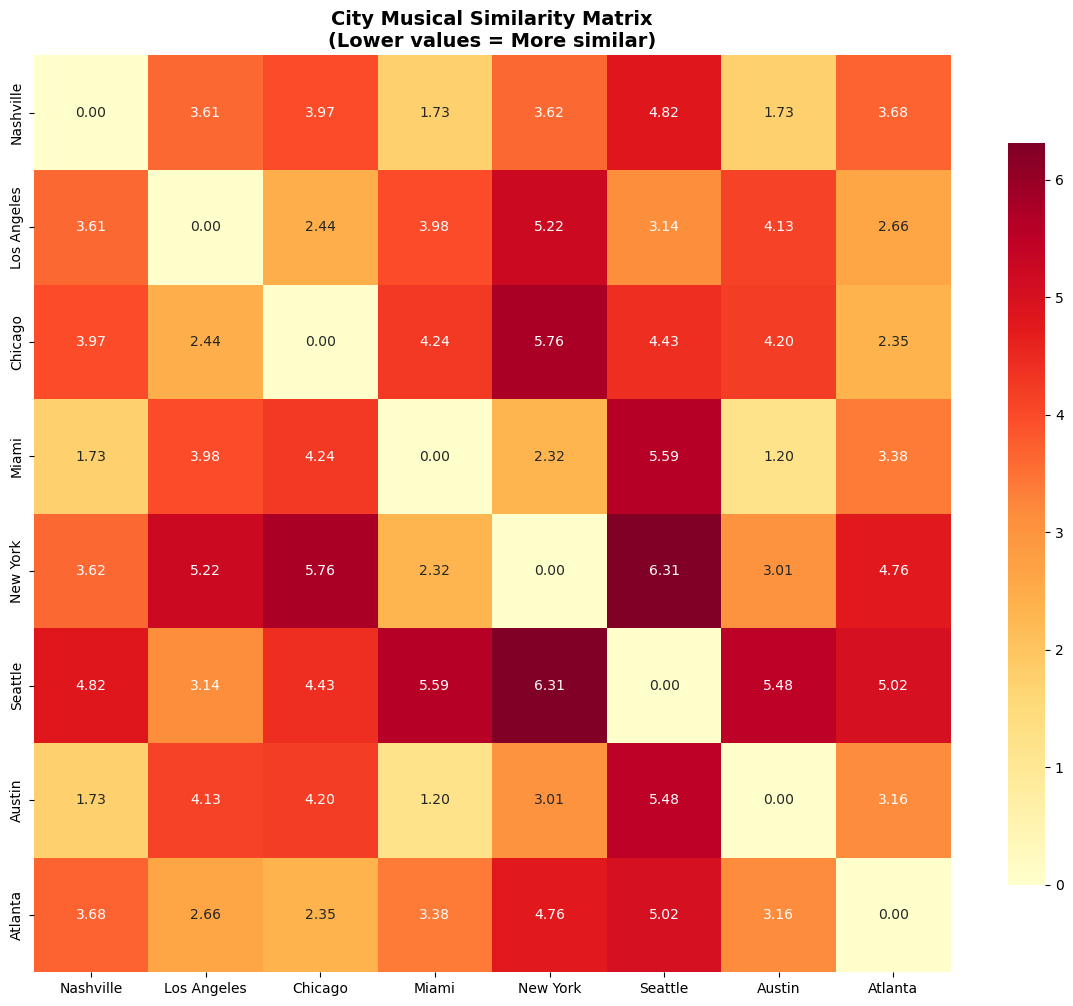

City Similarity Insights:
  Most similar: Miami ↔ Austin (distance: 1.200)
  Least similar: Nashville ↔ Nashville (distance: inf)


In [11]:
#city similarity analysis
print('\nCITY SIMILARITY ANALYSIS')
print('='*40)

from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform

#create city profiles
cities = df['city'].unique()
city_profiles = {}

for city in cities:
    city_data = df[df['city'] == city]
    
    profile = {
        'avg_artist_popularity': city_data['artist_popularity'].mean(),
       'avg_track_popularity': city_data['track_popularity'].mean(),
       'avg_followers': city_data['artist_followers'].mean(),
       'avg_duration': city_data['duration_minutes'].mean(),
       'avg_genre_count': city_data['genre_count'].mean(),
       'avg_track_age': city_data['track_age_years'].mean(),
       'explicit_rate': city_data['explicit'].mean()
    }
    
    city_profiles[city] = profile
    
#convert to df
profile_df = pd.DataFrame(city_profiles).T

#standardize features
scaler = StandardScaler()
profile_scaled = scaler.fit_transform(profile_df)

#calc distance matrix
distances = pdist(profile_scaled, metric='euclidean')
distance_matrix = squareform(distances)
distance_df = pd.DataFrame(distance_matrix, index=cities, columns=cities)

#viz city similarity
plt.figure(figsize=(12,10))
sns.heatmap(distance_df, 
           annot=True, 
           cmap='YlOrRd', 
           square=True,
           fmt='.2f',
           cbar_kws={"shrink": .8})
plt.title('City Musical Similarity Matrix\n(Lower values = More similar)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#find most and least similar cities
print('City Similarity Insights:')

#get upper triangle to avoid duplicates
upper_triangle = np.triu(distance_matrix, k=1)
upper_triangle[upper_triangle == 0] = np.inf

#most similar cities
min_distance_idx = np.unravel_index(np.argmin(upper_triangle), upper_triangle.shape)
min_distance = upper_triangle[min_distance_idx]
most_similar = (cities[min_distance_idx[0]], cities[min_distance_idx[1]])

print(f"  Most similar: {most_similar[0]} ↔ {most_similar[1]} (distance: {min_distance:.3f})")

#least similar cities
max_distance_idx = np.unravel_index(np.argmax(upper_triangle), upper_triangle.shape)
max_distance = upper_triangle[max_distance_idx]
least_similar = (cities[max_distance_idx[0]], cities[max_distance_idx[1]])

print(f"  Least similar: {least_similar[0]} ↔ {least_similar[1]} (distance: {max_distance:.3f})")



PRINCIPLE COMPONENT ANALYSIS


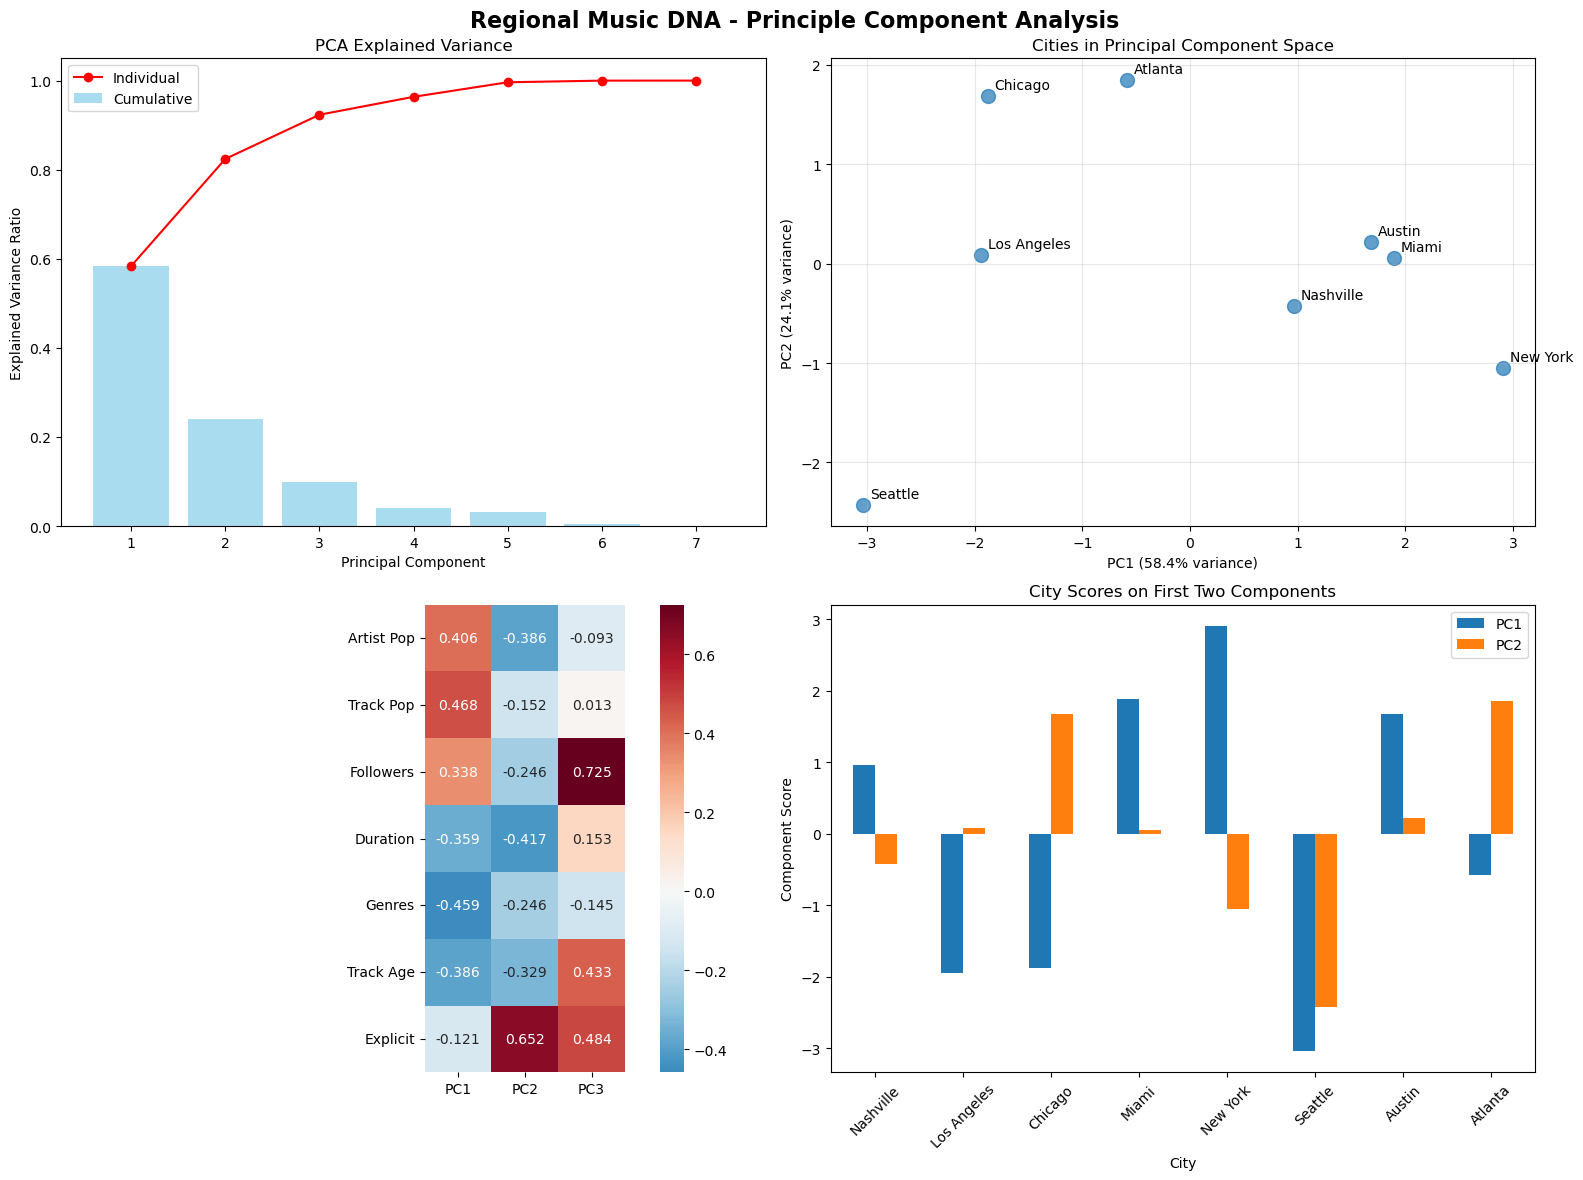

PCA Insights:
  First 2 components explain 82.4% of variance
  First 3 components explain 92.3% of variance

PC1 Interpretation (explains 58.4% of variance):
   - high track pop
   - low genres
   - high artist pop

PC2 Interpretation (explains 24.1% of variance):
  - high explicit
  - low duration
  - low artist pop


In [14]:
#principle component analysis
print('\nPRINCIPLE COMPONENT ANALYSIS')
print('='*40)

from sklearn.decomposition import PCA

#perform PCA on city profiles
pca = PCA()
pca_result = pca.fit_transform(profile_scaled)

#create PCA viz
fig, axes = plt.subplots(2,2, figsize=(16,12))
fig.suptitle('Regional Music DNA - Principle Component Analysis', fontsize=16, fontweight='bold')

#explained variance
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

axes[0,0].bar(range(1, len(explained_var)+1), explained_var, alpha=0.7, color='skyblue')
axes[0,0].plot(range(1, len(explained_var)+1), cumulative_var, 'ro-', color='red')
axes[0,0].set_xlabel('Principal Component')
axes[0,0].set_ylabel('Explained Variance Ratio')
axes[0,0].set_title('PCA Explained Variance')
axes[0,0].legend(['Individual', 'Cumulative'])

#PC1 vs PC2 scatter plot
axes[0,1].scatter(pca_result[:, 0], pca_result[:, 1], s=100, alpha=0.7)
for i, city in enumerate(cities):
   axes[0,1].annotate(city, (pca_result[i, 0], pca_result[i, 1]), 
                     xytext=(5, 5), textcoords='offset points', fontsize=10)
axes[0,1].set_xlabel(f'PC1 ({explained_var[0]:.1%} variance)')
axes[0,1].set_ylabel(f'PC2 ({explained_var[1]:.1%} variance)')
axes[0,1].set_title('Cities in Principal Component Space')
axes[0,1].grid(True, alpha=0.3)

#component loadings heatmap
feature_names = ['Artist Pop', 'Track Pop', 'Followers', 'Duration', 'Genres', 'Track Age', 'Explicit']
components_df = pd.DataFrame(
   pca.components_[:3].T,
   columns=['PC1', 'PC2', 'PC3'],
   index=feature_names
)

sns.heatmap(components_df, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.3f', ax=axes[1,0])

#city scores on PC1 and PC2
city_scores = pd.DataFrame(pca_result[:, :2], columns=['PC1', 'PC2'], index=cities)
city_scores.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('City Scores on First Two Components')
axes[1,1].set_xlabel('City')
axes[1,1].set_ylabel('Component Score')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].legend()

plt.tight_layout()
plt.show()

#print PCA insights
print("PCA Insights:")
print(f"  First 2 components explain {(explained_var[0] + explained_var[1]):.1%} of variance")
print(f"  First 3 components explain {cumulative_var[2]:.1%} of variance")

print(f"\nPC1 Interpretation (explains {explained_var[0]:.1%} of variance):")
pc1_loadings = components_df['PC1'].abs().sort_values(ascending=False)
for feature, loading in pc1_loadings.head(3).items():
   direction = "high" if components_df.loc[feature, 'PC1'] > 0 else "low"
   print(f"   - {direction} {feature.lower()}")

print(f"\nPC2 Interpretation (explains {explained_var[1]:.1%} of variance):")
pc2_loadings = components_df['PC2'].abs().sort_values(ascending=False)
for feature, loading in pc2_loadings.head(3).items():
   direction = "high" if components_df.loc[feature, 'PC2'] > 0 else "low"
   print(f"  - {direction} {feature.lower()}")

In [16]:
#statistical test results summary
print('\nSTATISTICAL TESTS SUMMARY')
print('='*50)

#perform key stat tests
from scipy.stats import kruskal, chi2_contingency

##test artist pop differences across cities
artist_pop_groups = [df[df['city'] == city]['artist_popularity'].dropna() for city in cities]
h_stat, p_value = kruskal(*artist_pop_groups)

print("\n1.Artist Popularity Differences Across Cities:")
print(f"  Kruskal-Wallis H-statistic: {h_stat:.3f}")
print(f"  p-value: {p_value:.6f}")
print(f"  Interpretation: {'Significant differences exist' if p_value < 0.05 else 'No significant differences'}")


#test track popularity diff
track_pop_groups = [df[df['city'] == city]['track_popularity'].dropna() for city in cities]
h_stat2, p_value2 = kruskal(*artist_pop_groups)

print("\n2.Track Popularity Differences Across Cities:")
print(f"  Kruskal-Wallis H-statistic: {h_stat2:.3f}")
print(f"  p-value: {p_value2:.6f}")
print(f"  Interpretation: {'Significant differences exist' if p_value2 < 0.05 else 'No significant differences'}")

#test music era distribution independence
era_crosstab = pd.crosstab(df['city'], df['music_era'])
chi2, p_val, dof, expected = chi2_contingency(era_crosstab)

print(f"\n3. Music Era Distribution Independence:")
print(f"  Chi-square statistic: {chi2:.3f}")
print(f"  p-value: {p_val:.6f}")
print(f"  Degrees of freedom: {dof}")
print(f"  Interpretation: {'Era preferences depend on city' if p_val < 0.05 else 'Era preferences independent of city'}")

#test artist tier distribution independence
tier_crosstab = pd.crosstab(df['city'], df['artist_tier'])
chi2_tier, p_val_tier, dof_tier, expected_tier = chi2_contingency(era_crosstab)

print(f"\n3. Music Era Distribution Independence:")
print(f"  Chi-square statistic: {chi2_tier:.3f}")
print(f"  p-value: {p_val_tier:.6f}")
print(f"  Degrees of freedom: {dof_tier}")
print(f"  Interpretation: {'Tier preferences depend on city' if p_val_tier < 0.05 else 'Era preferences independent of city'}")



STATISTICAL TESTS SUMMARY

1.Artist Popularity Differences Across Cities:
  Kruskal-Wallis H-statistic: 226.769
  p-value: 0.000000
  Interpretation: Significant differences exist

2.Track Popularity Differences Across Cities:
  Kruskal-Wallis H-statistic: 226.769
  p-value: 0.000000
  Interpretation: Significant differences exist

3. Music Era Distribution Independence:
  Chi-square statistic: 911.616
  p-value: 0.000000
  Degrees of freedom: 35
  Interpretation: Era preferences depend on city

3. Music Era Distribution Independence:
  Chi-square statistic: 911.616
  p-value: 0.000000
  Degrees of freedom: 35
  Interpretation: Tier preferences depend on city


In [18]:
#key insights summary
print('\nKEY STATISTICAL INSIGHTS')
print('='*50)

#generate automated insights based on analysis
insights=[]

#pop insights
city_artist_pop = df.groupby('city')['artist_popularity'].mean().sort_values(ascending=False)
highest_pop_city = city_artist_pop.index[0]
lowest_pop_city = city_artist_pop.index[-1]
insights.append(f'{highest_pop_city} features the most popular artists (avg: {city_artist_pop.iloc[0]:.1f})')
insights.append(f'{lowest_pop_city} features the least popular artists (avg: {city_artist_pop.iloc[-1]:.1f})')

#genre diveristy insights
diversity_ranking = pd.DataFrame(genre_diversity).T.sort_values('unique_genres', ascending=False)
most_diverse = diversity_ranking.index[0]
least_diverse = diversity_ranking.index[-1]
insights.append(f"{most_diverse} has the highest genre diversity ({diversity_ranking.loc[most_diverse, 'unique_genres']} unique genres)")
insights.append(f"{least_diverse} has the most focused genre profile ({diversity_ranking.loc[least_diverse, 'unique_genres']} unique genres)")

#age insights
city_age = df.groupby('city')['track_age_years'].mean().sort_values()
newest_music_city = city_age.index[0]
oldest_music_city = city_age.index[-1]
insights.append(f"{newest_music_city} features the newest music (avg age: {city_age.iloc[0]:.1f} years)")
insights.append(f"{oldest_music_city} features the most classic music (avg age: {city_age.iloc[-1]:.1f} years)")

#similarity insights
insights.append(f"Most musically similar cities: {most_similar[0]} and {most_similar[1]}")
insights.append(f"Most musically different cities: {least_similar[0]} and {least_similar[1]}")

#statistical significance insights
if p_value < 0.05:
    insights.append('Cities have statistically significant differences in artist popularity')
if p_value2 < 0.05:
    insights.append('Cities have statistically significant differences in track popularity')
if p_val < 0.05:
    insights.append('Music era preferences are statistically different across cities')
    
print('Automated Insights:')
for i, insight in enumerate(insights, 1):
    print(f'  {i}. {insight}')
    
print('\nStatistical Analysis complete!')
print(f'Analyzed {len(df):,} tracks across {df["city"].nunique()} cities')
print(f'Generated {len(insights)} key insights')


KEY STATISTICAL INSIGHTS
Automated Insights:
  1. New York features the most popular artists (avg: 78.1)
  2. Chicago features the least popular artists (avg: 56.5)
  3. Los Angeles has the highest genre diversity (109.0 unique genres)
  4. Nashville has the most focused genre profile (16.0 unique genres)
  5. Austin features the newest music (avg age: 5.8 years)
  6. Seattle features the most classic music (avg age: 29.4 years)
  7. Most musically similar cities: Miami and Austin
  8. Most musically different cities: Nashville and Nashville
  9. Cities have statistically significant differences in artist popularity
  10. Cities have statistically significant differences in track popularity
  11. Music era preferences are statistically different across cities

Statistical Analysis complete!
Analyzed 1,562 tracks across 8 cities
Generated 11 key insights


In [19]:
#export results for further analysis
summary_stats = []
for city in cities:
    city_data = df[df['city'] == city]
    summary_stats.append({
        'city': city,
        'total_tracks': len(city_data),
        'avg_artist_popularity': city_data['artist_popularity'].mean(),
        'avg_track_popularity': city_data['track_popularity'].mean(),
        'avg_followers': city_data['artist_followers'].mean(),
        'avg_duration_min': city_data['duration_minutes'].mean(),
        'avg_genre_count': city_data['genre_count'].mean(),
        'avg_track_age': city_data['track_age_years'].mean(),
        'explicit_rate': city_data['explicit'].mean(),
        'unique_genres': genre_diversity[city]['unique_genres'],
        'pc1_score': pca_result[list(cities).index(city), 0],
        'pc2_score': pca_result[list(cities).index(city), 1]
    })
    
summary_df = pd.DataFrame(summary_stats)

#save summary stats
from datetime import datetime
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
summary_file = f'../data/processed/city_summary_stats_{timestamp}.csv'
summary_df.to_csv(summary_file, index=False)

print(f'City summary statistics saved to: {summary_file}')

#display final summary
print('\nFINAL SUMMARY TABLE')
print('='*40)

display_cols = ['city', 'avg_artist_popularity', 'avg_track_popularity', 'unique_genres', 'avg_track_age']
print(summary_df[display_cols].round(2))

print('\nStatistical Analysis Complete!')

City summary statistics saved to: ../data/processed/city_summary_stats_20250708_193443.csv

FINAL SUMMARY TABLE
          city  avg_artist_popularity  ...  unique_genres  avg_track_age
0    Nashville                  74.61  ...             16           7.41
1  Los Angeles                  63.97  ...            109          26.25
2      Chicago                  56.50  ...             48          11.17
3        Miami                  72.70  ...             48           8.13
4     New York                  78.07  ...             26          11.51
5      Seattle                  67.41  ...             36          29.42
6       Austin                  74.41  ...             22           5.77
7      Atlanta                  65.51  ...             19          14.63

[8 rows x 5 columns]

Statistical Analysis Complete!
